# About Data
* The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each connection record consists of about 100 bytes.
<br>For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features) .The class variable has two categories:<br>
• Normal
• Anomalous

In [ ]:
! kaggle datasets download sampadab17/network-intrusion-detection
! unzip network-intrusion-detection.zip

Dataset URL: https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection
License(s): unknown
network-intrusion-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  network-intrusion-detection.zip
replace Test_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Test_data.csv           
replace Train_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Train_data.csv          


# Data Exploration


In [ ]:
# import modules
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import imblearn

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load CSV files
train_df= pd.read_csv('Train_data.csv')
test_df= pd.read_csv('Test_data.csv')

# Display basic info
# Number of rows, columns, data types, and memory usage
print('Train Data Info:')
print(train_df.info())

print('\nTest Data Info:')
print(test_df.info())

# Display statistical summary
# Summary statistics(mean, min, max, standard deviation, etc.)
print('Train Data Summary:')
print(train_df.describe())

print('\nTest Data Summary:')
print(test_df.describe())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13 

* This is supervised learning
1. Use regression to predict only quantitative features.
2. Find relationships between features


### Regression vs Classification
* If it is quantitative value, use regression.
* If not, use classification

# Check Outliers


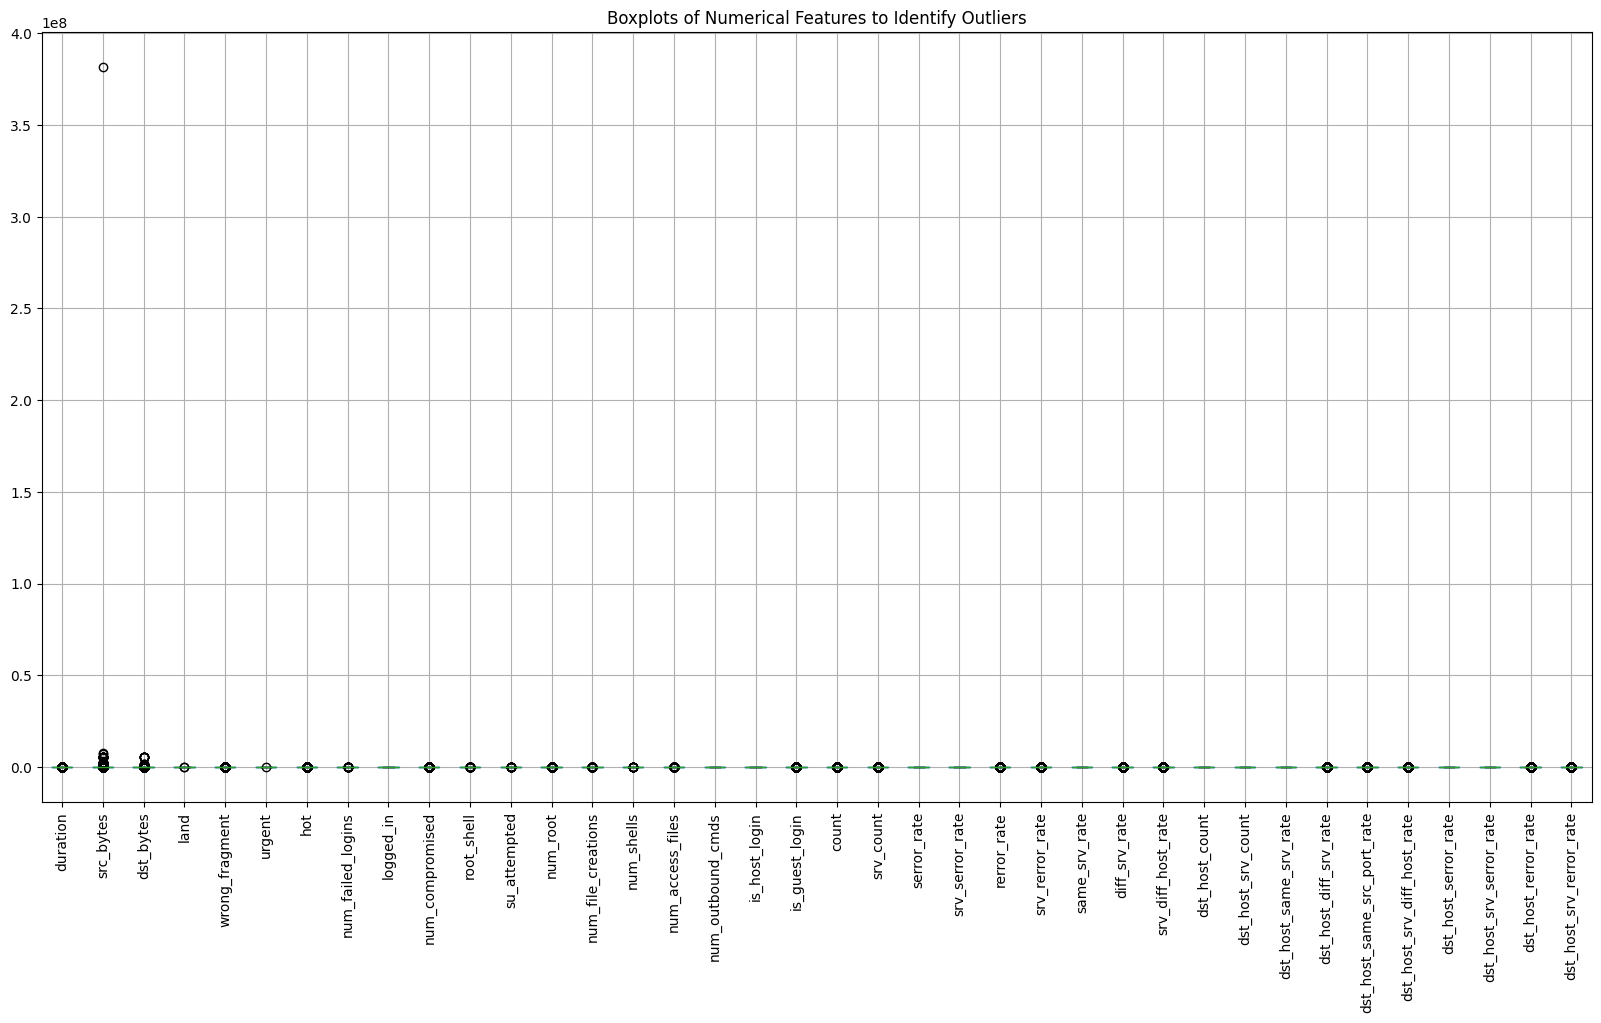

In [ ]:
import matplotlib.pyplot as plt

numeric_columns = train_df.select_dtypes(include=['number']).columns

plt.figure(figsize=(20, 10))
train_df[numeric_columns].boxplot(rot=90)
plt.title('Boxplots of Numerical Features to Identify Outliers')
plt.show()

# Outliers Removal


In [ ]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train_df[numeric_columns].quantile(0.25)
Q3 = train_df[numeric_columns].quantile(0.75)

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outlier boundaries using the 1.5 * IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where any feature value is below the lower bound or above the upper bound
train_df = train_df[
    ~((train_df[numeric_columns] < lower_bound) | (train_df[numeric_columns] > upper_bound)).any(axis=1)
]


# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from IPython.display import display

# Encoding categorical features
categorical_features = ['protocol_type', 'service', 'flag']
label_encoders = {col: LabelEncoder() for col in categorical_features}
scaled_columns = train_df.columns.difference(['class'])

# Reinitialize MinMaxScaler
scaler = MinMaxScaler()

# Re-apply categorical encoding while handling unseen values
for col, encoder in label_encoders.items():
    train_df[col] = encoder.fit_transform(train_df[col])

    # Handle unknown values in test set by mapping them to -1
    test_df[col] = test_df[col].apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1)

# Convert class labels to binary (0 = normal, 1 = anomaly)
train_df['class'] = train_df['class'].apply(lambda x: 0 if x == 'normal' else 1)

# Scale numerical features
train_df[scaled_columns] = scaler.fit_transform(train_df[scaled_columns])
test_df[scaled_columns] = scaler.transform(test_df[scaled_columns])

# Display preprocessed training data
# tools.display_dataframe_to_user(name="Preprocessed Training Data", dataframe=train_df)
display(train_df)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,0.5,0.292308,0.9,1.286320e-06,0.000000,0.0,0.0,0.0,0.0,...,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0.0,1.0,0.630769,0.9,3.824902e-07,0.000000,0.0,0.0,0.0,0.0,...,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0.0,0.5,0.707692,0.5,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0.0,0.5,0.338462,0.9,6.077927e-07,0.001583,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0.0,0.5,0.338462,0.9,5.213394e-07,0.000082,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0.0,0.5,0.246154,0.2,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,0.027451,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0.0,0.5,0.292308,0.9,8.750119e-07,0.000000,0.0,0.0,0.0,0.0,...,0.152941,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0.0,0.5,0.707692,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,0.050980,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0.0,0.5,0.584615,0.5,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,0.078431,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


# Deep learning model using CNN
## Why CNN for network intrusion detection?
1. Automatic Feature Extraction - CNNs learn important feature relationships better than traditional MLP models
2. Local Feature Learning - Helps detect pattern anomalies in network traffic
3. Efficient Training - Requires fewer parameters than fully connected deep networks
4. Better Generalization - Reduces overfitting compared to MLPs.

### CNN model structure for intrusion detection
* Input layer: Reshape the tabular data to a 2D format
* Conv1D layer: Learn spatial dependencies in network features.
* Pooling layer: Reduce dimensionality and improve generalization.
* Flatten layer: Convert feature maps into a vector
* Fully connected layer(Dense): Classify the data into normal or anomaly
* Output layer: sigmoid activation for binary classification


## CNN model
* This CNN model is structured for intrusion detection with 1D convolutional layers to learn patterns from the input data.
### CNN model architecture breakdown
1. Conv1D layer(32 filters, kernel_size=3, activation='relu')
  * extracts local patterns from network traffic features.
  * 32 filters learn different feature representations.
  * ReLU activation introduces non-linearity.
2. BatchNormalization
  * Normalizes activations to improve stability and speed up training.
3. MaxPooling1D(pool_size=2)
  * Reduces dimensionality while keeping important information.
  * Helps generalize better by removing unnecessary details.
4. Conv1D Layer(64 filters, kernel_size=3, activation='relu')
  * Adds deeper feature extraction with more filters.
5. BatchNormalization
  * Again stabilizes training by keeping feature distributions steady.
6. MaxPooling1D (pool_size=2)
  * Further reduces dimensionality while retaining important information.
7. Flatten Layer
  * Converts 2D feature maps into a 1D vector for the dense layers.
8. Dense Layer(128 neurons, ReLU actiavtion)
  * Fully connected layer for learning complex relationships.
9. Dense Layer(64 neurons, ReLU activation)
  * Further learns abstract patterns
10. Output Layer(1 neuron, Sigmoid activation)
  * Since this is a binary classification(normal vs attack), a sigmoid activation outputs a probability(0 to 1).
  * Values > 0.5 are classified as anomalies, and =< 0.5 are classified as normal traffic.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

# Separate features and labels
X = train_df.drop(columns=['class']).values  # Features
y = train_df['class'].values  # Labels

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN (CNN expects a 3D input: (samples, time steps, features))
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))


Epoch 1/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9225 - loss: 0.2171 - val_accuracy: 0.9671 - val_loss: 0.0933
Epoch 2/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9665 - loss: 0.1013 - val_accuracy: 0.9724 - val_loss: 0.0752
Epoch 3/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9709 - loss: 0.0828 - val_accuracy: 0.9760 - val_loss: 0.0577
Epoch 4/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9705 - loss: 0.0732 - val_accuracy: 0.9784 - val_loss: 0.0530
Epoch 5/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9762 - loss: 0.0602 - val_accuracy: 0.9827 - val_loss: 0.0452
Epoch 6/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9771 - loss: 0.0545 - val_accuracy: 0.9823 - val_loss: 0.0480
Epoch 7/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9783 - loss: 0.0541 - val_accuracy: 0.9847 - val_loss: 0.0425
Epoch 8/20
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9823 - loss: 0.0492 - val_accuracy: 

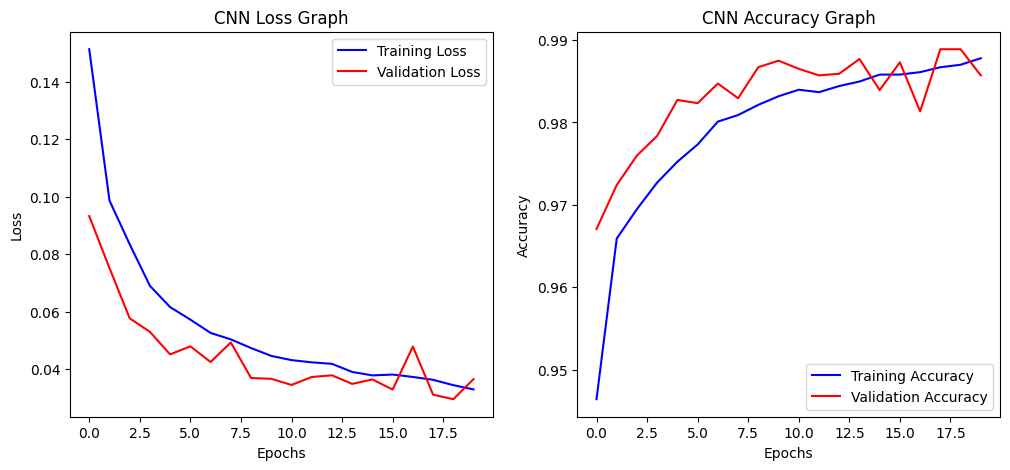

In [ ]:
# Define CNN Model
cnn_model2 = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (normal vs attack)
])

# Compile the model
cnn_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = cnn_model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Extract values from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a figure
plt.figure(figsize=(12, 5))

# Plot Loss Graph
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Loss Graph')
plt.legend()

# Plot Accuracy Graph
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy Graph')
plt.legend()

# Show the plots
plt.show()



Epoch 1/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9693 - loss: 0.0640 - val_accuracy: 1.0000 - val_loss: 0.1644
Epoch 2/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 1.0000 - loss: 1.7039e-06 - val_accuracy: 1.0000 - val_loss: 0.0143
Epoch 3/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 4.5644e-07 - val_accuracy: 1.0000 - val_loss: 2.1895e-04
Epoch 4/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.8853e-07 - val_accuracy: 1.0000 - val_loss: 3.0352e-06
Epoch 5/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.4933e-07 - val_accuracy: 1.0000 - val_loss: 1.3387e-07
Epoch 6/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 9.8511e-08 - val_accuracy: 1.0000 - val_loss: 2.6022e-08
Epoch 7/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.4845e-07 - val_accuracy: 1.0000 - val_loss: 1.3720e-08
Epoch 8/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accur

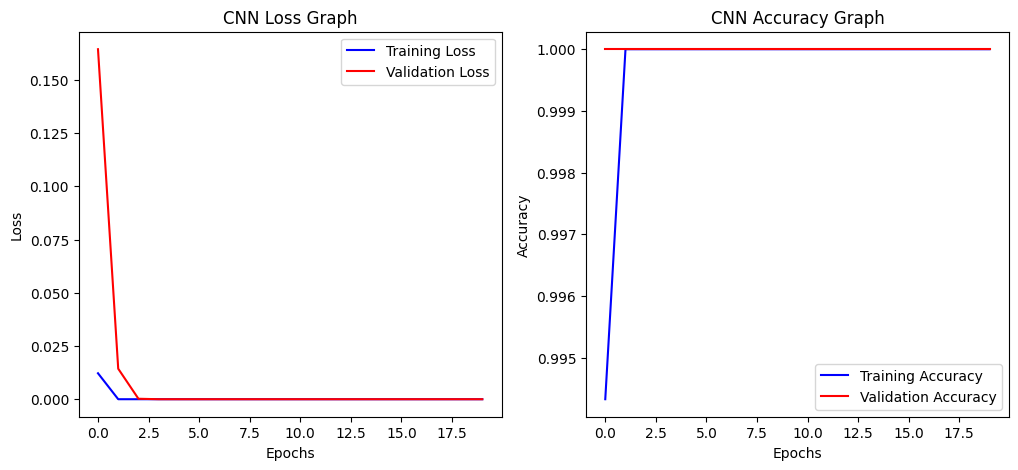

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 39, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 39, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 17, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 17, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,733 (944.27 KB)

 Trainable params: 80,513 (314.50 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 161,028 (629.02 KB)

In [ ]:
# Define CNN Model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (normal vs attack)
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Extract values from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a figure
plt.figure(figsize=(12, 5))

# Plot Loss Graph
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Loss Graph')
plt.legend()

# Plot Accuracy Graph
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy Graph')
plt.legend()

# Show the plots
plt.show()

# Display model summary
cnn_model.summary()


# Steps to test the model on test_df
1. Preprocess the Test data
  * Ensure test_df is processed in the same way as train_df
  * Encode categorical features
  * Scale numerical features
  * Reshape Data to match the input shape expected by CNN

In [ ]:
X_test = test_df.drop(columns=['class'], errors='ignore').values # Exclude class column if present
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1)) # Reshape for CNN

In [ ]:
# Predict probabilities
y_pred_prob = cnn_model.predict(X_test)

# Convert probabilities to binary labels(0 = normal, 1 = anomaly)
y_pred = (y_pred_prob > 0.5).astype(int)

705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
import numpy as np
# Count predicted anomalies
num_anomalies = np.sum(y_pred)
num_normal = len(y_pred) - num_anomalies

print(f'Predicted Normal: {num_normal}')
print(f'Predicted Anomalies: {num_anomalies}')

Predicted Normal: 2
Predicted Anomalies: 22542


In [ ]:
# Predict probabilities
y_pred_prob2 = cnn_model2.predict(X_test)

# Convert probabilities to binary labels(0 = normal, 1 = anomaly)
y_pred2 = (y_pred_prob2 > 0.5).astype(int)

import numpy as np
# Count predicted anomalies
num_anomalies = np.sum(y_pred2)
num_normal = len(y_pred2) - num_anomalies

print(f'Predicted Normal: {num_normal}')
print(f'Predicted Anomalies: {num_anomalies}')

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted Normal: 0
Predicted Anomalies: 22544


In [ ]:
# Create a DataFrame with predictions
test_results = pd.DataFrame(test_df)
test_results['Predicted_Class'] = y_pred # Add predictions

# Save to CSV
test_results.to_csv('test_predictions.csv', index=False)

print('Predictions saved to test_predictions.csv')


Predictions saved to test_predictions.csv


# Split_train_test train_df



In [ ]:
from sklearn.model_selection import train_test_split

# Ensure 'class' column exists before splitting
if 'class' in train_df.columns:
    # Separate features and labels
    X_train_full = train_df.drop(columns=['class']).values
    y_train_full = train_df['class'].values

    # Split into validation (50%) and final test set (50%)
    X_test, X_val, y_test, y_val = train_test_split(X_train_full, y_train_full, test_size=0.5, random_state=42)
else:
    print("No ground truth labels ('class' column) found in test_df.")


In [ ]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

In [ ]:
# Evaluate on validation set
val_loss, val_acc = cnn_model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Accuracy: {val_acc:.4f}")

# Evaluate on test set
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9982 - loss: 0.6409
Validation Accuracy: 0.9985
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.6404
Test Accuracy: 0.9980


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Get model predictions
y_val_pred_prob = cnn_model.predict(X_val)
y_test_pred_prob = cnn_model.predict(X_test)

# Convert probabilities to binary labels
y_val_pred = (y_val_pred_prob > 0.5).astype(int)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Print classification reports
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation Set Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00      3947

    accuracy                           1.00      3947
   macro avg       0.50      0.50      0.50      3947
weighted avg       1.00      1.00      1.00      3947

Test Set Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00      3946

    accuracy                           1.00      3946
   macro avg       0.50      0.50      0.50      3946
weighted avg       1.00      1.00      1.00      3946



In [ ]:
X_train = train_df.drop(columns=['class']).values
y_train = train_df['class'].values

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Reshape for CNN input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# Verify the shape of input data
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)


X_train shape: (6314, 41, 1)
X_val shape: (1579, 41, 1)
Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=True
  • mask=None

In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1
